In [1]:
# https://github.com/LCAV/pyroomacoustics/blob/master/examples/noise_reduction_wiener_filtering.py

In [16]:
from pyroomacoustics.denoise import IterativeWiener
import pyroomacoustics as pra
import time

In [54]:
import librosa
import os
BASE_FOLDER =  r'../../'
filepath = r'\dataset\min6dB\pump\id_02\normal\00000002.wav'
ch, sr = librosa.load(os.path.abspath(BASE_FOLDER+filepath), sr=None, mono=False)
noisy_signal = ch[0]

In [55]:
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
def psd(d):
    psd = feature_extractor_welchPSD(BASE_FOLDER)
    mf = memory_wave_file()
    mf.filepath = filename
    mf.srate = fs
    mf.channel = d
    psd.create_from_wav(mf)
    psd.plot()
    plt.show()

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother


In [56]:
from IPython.display import display, Markdown, Audio

In [75]:
# the number of LPC coefficients to consider
lpc_order = 30
# the number of iterations to update wiener filter
iterations = 4
# FFT length
frame_len = 512
# parameter update of the sigma in sigma tracking
alpha = 0.1   # smaller value allows noise floor to change faster
threshold = 0.001

# setup the denoise object
scnr = IterativeWiener(frame_len, lpc_order, iterations, alpha, threshold)
# derived parameters
hop = frame_len // 2
win = pra.hann(frame_len, flag='asymmetric', length='full')
stft = pra.transform.STFT(frame_len, hop=hop,
                          analysis_window=win,
                          streaming=True)


start_time = time.time()
processed_audio = np.zeros(noisy_signal.shape)
n = 0
noisy_signal = pra.normalize(noisy_signal)
while noisy_signal.shape[0] - n >= hop:

    # to frequency domain, 50% overlap
    stft.analysis(noisy_signal[n:(n + hop), ])

    # compute Wiener output
    X = scnr.compute_filtered_output(current_frame=stft.fft_in_buffer,
                                     frame_dft=stft.X)

    # back to time domain
    processed_audio[n:n + hop, ] = stft.synthesis(X)

    # update step
    n += hop
    
processed_audio = pra.normalize(processed_audio)
proc_time = time.time() - start_time
print("Processing time: {} minutes".format(proc_time/60))

Processing time: 0.5078252871831258 minutes


In [69]:
noisy_signal.shape[0] 

160000

#### orginal

#### denoised

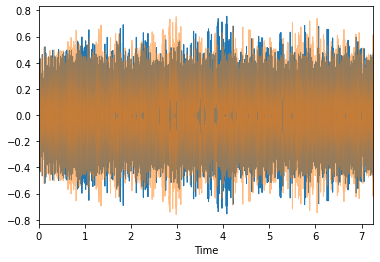

In [76]:
display(Markdown('#### ' + 'orginal'))
display(Audio(data=noisy_signal,rate=sr))

plt.show()
#psd(data)

display(Markdown('#### ' + 'denoised'))
display(Audio(data=processed_audio,rate=sr))

librosa.display.waveplot(noisy_signal,sr)
librosa.display.waveplot(processed_audio,alpha=0.5)

plt.show()
#psd(data)